# TitanicコンペをPyTorch MLPで適当に解くサンプル

PyTorchを慣れるために遊んでみた

## Colaboratoryの色々設定

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
! ls

drive  sample_data


## 前処理とか特徴エンジニアリングとか
クッソ雑に


In [0]:
import pandas as pd
train_df = pd.read_csv('drive/My Drive/Colab Notebooks/data/titanic/train.csv')
test_df = pd.read_csv('drive/My Drive/Colab Notebooks/data/titanic/test.csv')

In [4]:
train_test_df = train_df.append(test_df).reset_index(drop=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
train_test_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [6]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Nullあり 
- Age 平均とる
- Cabin 'None'を与える
- Embarked 'None'を与える
- Fare 平均をとる

In [0]:
train_test_df['Age'] = train_test_df['Age'].fillna(train_test_df['Age'].mean())
train_test_df['Cabin'] = train_test_df['Cabin'].fillna('None')
train_test_df['Embarked'] = train_test_df['Cabin'].fillna('None')
train_test_df['Fare'] = train_test_df['Fare'].fillna(train_test_df['Fare'].mean())

In [8]:
# 確認
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### カテゴリカルデータをOne-Hot Encodeする
(Non Tree methodなので)

In [0]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()

In [0]:
from scipy.sparse import hstack

categoricals = ['Cabin', 'Embarked', 'Pclass', 'Sex', 'Ticket']

categ_data_one_hot_encoded = None
for i, target in enumerate(categoricals):
  target_value = train_test_df[target].values.reshape(-1, 1)
  if i == 0:
    categ_data_one_hot_encoded = ohe.fit_transform(target_value)
  else:
    tmp = ohe.fit_transform(target_value)
    categ_data_one_hot_encoded = hstack([categ_data_one_hot_encoded, tmp])

In [11]:
categ_data_one_hot_encoded

<1309x1308 sparse matrix of type '<class 'numpy.float64'>'
	with 6545 stored elements in COOrdinate format>

In [0]:
# Concat with other feature
from scipy.sparse import coo_matrix

non_categoricals = ['Age', 'Fare', 'Parch', 'SibSp']
non_categ_data = coo_matrix(train_test_df[non_categoricals].values)

train_test_X = hstack([non_categ_data, categ_data_one_hot_encoded]).toarray()

In [13]:
# 確認
train_test_X

array([[22.        ,  7.25      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [38.        , 71.2833    ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [26.        ,  7.925     ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [38.5       ,  7.25      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [29.88113767,  8.05      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [29.88113767, 22.3583    ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
rs = preprocessing.RobustScaler(
    with_centering=True,
    with_scaling=True,
    quantile_range=(25.0, 75.0),
    copy=True)

train_test_X = rs.fit_transform(train_test_X)

In [15]:
train_test_X

array([[-0.60624136, -0.3081457 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62452787,  2.43075469,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.29854905, -0.27927388,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.66298941, -0.3081457 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.27392725,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.33808257,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

### データ分割

In [0]:
# train_X =  train_test_X[:train_df.shape[0]]
# test_X = train_test_X[train_df.shape[0]:]

train_y =  train_test_df['Survived'][:train_df.shape[0]].values

In [0]:
import numpy as np
train_test_X = train_test_X.astype(np.float32)
train_y = train_y.astype(np.float32)

In [0]:
import torch
tensor_train_test_X = \
  torch.stack([torch.from_numpy(np.array(i)) for i in train_test_X])
tensor_train_y = torch.stack([torch.from_numpy(np.array(i)) for i in train_y])

In [0]:
# 学習用
tensor_train_X = tensor_train_test_X[:tensor_train_y.shape[0]]
# 提出用
tensor_test_X = tensor_train_test_X[tensor_train_y.shape[0]:]

## PyTorchの適当なNNでTitanicの生存者を予測する

### Torch用データセット作成

In [0]:
import torch
from  torch.utils.data import random_split

In [0]:
train_dataset = torch.utils.data.TensorDataset(tensor_train_X, tensor_train_y)
len_dataset = tensor_train_X.shape[0]
train_ratio = 0.7
train_dataset, valid_dataset = random_split(
    train_dataset,
    [int(len_dataset*train_ratio), len_dataset - int(len_dataset*train_ratio)])

In [22]:
# 確認

print('train length: ', len(train_dataset))
print('valid length', len(valid_dataset))

train length:  623
valid length 268


### Torch用 loader 設定

In [0]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=64,
    num_workers=4)
valid_loader = torch.utils.data.DataLoader(
    valid_dataset,
    shuffle=False,
    batch_size=64,
    num_workers=4)

### MLPの定義

In [0]:
dim_tensor = tensor_train_X.shape[1]

In [0]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Multi Layer Perceptron Network
class MLPNet (nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(dim_tensor, 1024)   
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 1)
        self.dropout1 = nn.Dropout2d(0.7)
        self.dropout2 = nn.Dropout2d(0.5)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        return F.sigmoid(self.fc3(x))
 
# select device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MLPNet().to(device)
 
# optimizing
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001, weight_decay=5e-4, betas=(0.9, 0.999))

### 学習&検証

In [0]:
from sklearn.metrics import roc_auc_score

In [27]:
import warnings
warnings.filterwarnings('ignore')

###  training
print ('training start ...')
num_epochs = 50
 
# initialize list for plot graph after training
train_loss_list, train_acc_list, val_loss_list, val_acc_list, val_auc_list = [], [], [], [], []
total_outputs = None
total_labels = None
 
for epoch in range(num_epochs):
    # initialize each epoch
    train_loss, train_acc, val_loss, val_acc, val_auc = 0, 0, 0, 0, 0
    
    # ======== train_mode ======
    net.train()
    for i, (samples, labels) in enumerate(train_loader):  # ミニバッチ回数実行
        # deviceへ転送
        samples, labels = samples.to(device), labels.to(device)
        optimizer.zero_grad()  # 勾配リセット
        outputs = net(samples)  # 順伝播の計算
        
        loss = criterion(outputs.reshape(-1,), labels.reshape(-1,))  # lossの計算
        train_loss += loss.item()  # train_loss に結果を蓄積        
        acc = (outputs.max(1)[1] == labels.long()).sum()  #  予測とラベルが合っている数の合計
        train_acc += acc.item()  # train_acc に結果を蓄積
        loss.backward()  # 逆伝播の計算        
        optimizer.step()  # 重みの更新
        avg_train_loss = train_loss / len(train_loader.dataset)  # lossの平均を計算
        avg_train_acc = train_acc / len(train_loader.dataset)  # accの平均を計算
    
    # ======== valid_mode ======
    net.eval()
    with torch.no_grad():  # 必要のない計算を停止
      for j, (samples, labels) in enumerate(valid_loader):        
          samples, labels = samples.to(device), labels.to(device)
          outputs = net(samples)
          loss = criterion(outputs.reshape(-1,), labels.reshape(-1,))
          val_loss += loss.item()
          acc = (outputs.max(1)[1].long() == labels.long()).sum()
          val_acc += acc.item()
          
          # AUC計算
          outputs_list = outputs.reshape(-1,).cpu().numpy()
          labels_list = labels.reshape(-1,).cpu().numpy()
          val_auc += roc_auc_score(labels_list, outputs_list)
          if j == 0:
            total_outputs = outputs_list
            total_labels = labels_list
          else:
            total_outputs = np.concatenate([total_outputs, outputs_list])
            total_labels = np.concatenate([total_labels, labels_list])
          
    avg_val_loss = val_loss / len(valid_loader.dataset)
    avg_val_acc = val_acc / len(valid_loader.dataset)
    avg_val_auc = val_auc / len(valid_loader.dataset)
    
    # print log
    print ('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}' 
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss))
 
    # append list for polt graph after training
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)
    val_auc_list.append(avg_val_auc)
 

training start ...
Epoch [1/50], Loss: 0.0110, val_loss: 0.0128
Epoch [2/50], Loss: 0.0109, val_loss: 0.0127
Epoch [3/50], Loss: 0.0108, val_loss: 0.0125
Epoch [4/50], Loss: 0.0107, val_loss: 0.0124
Epoch [5/50], Loss: 0.0105, val_loss: 0.0122
Epoch [6/50], Loss: 0.0104, val_loss: 0.0120
Epoch [7/50], Loss: 0.0101, val_loss: 0.0118
Epoch [8/50], Loss: 0.0099, val_loss: 0.0115
Epoch [9/50], Loss: 0.0096, val_loss: 0.0112
Epoch [10/50], Loss: 0.0092, val_loss: 0.0108
Epoch [11/50], Loss: 0.0088, val_loss: 0.0105
Epoch [12/50], Loss: 0.0085, val_loss: 0.0101
Epoch [13/50], Loss: 0.0080, val_loss: 0.0098
Epoch [14/50], Loss: 0.0076, val_loss: 0.0096
Epoch [15/50], Loss: 0.0072, val_loss: 0.0093
Epoch [16/50], Loss: 0.0069, val_loss: 0.0091
Epoch [17/50], Loss: 0.0066, val_loss: 0.0090
Epoch [18/50], Loss: 0.0063, val_loss: 0.0088
Epoch [19/50], Loss: 0.0061, val_loss: 0.0087
Epoch [20/50], Loss: 0.0060, val_loss: 0.0087
Epoch [21/50], Loss: 0.0059, val_loss: 0.0086
Epoch [22/50], Loss: 0.0

In [0]:
total_outputs = 1 * (total_outputs >= 0.5)

### 結果

In [29]:
# 正解率
from sklearn.metrics import accuracy_score
accuracy_score(total_labels, total_outputs)

0.8208955223880597

In [30]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(total_labels, total_outputs)

0.8120946538124452

In [0]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(total_labels, total_outputs)

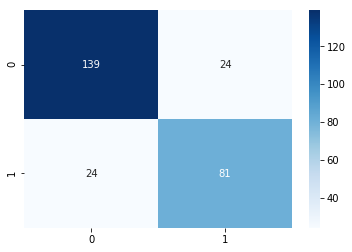

In [32]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="d")